### 1.1 Swiss Role Dataset

(3000L, 3L)


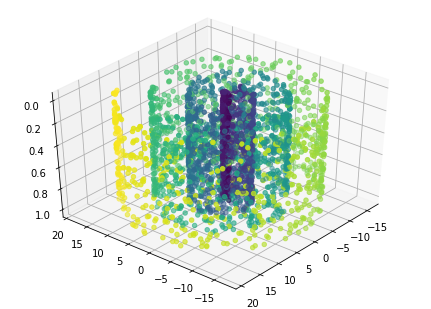

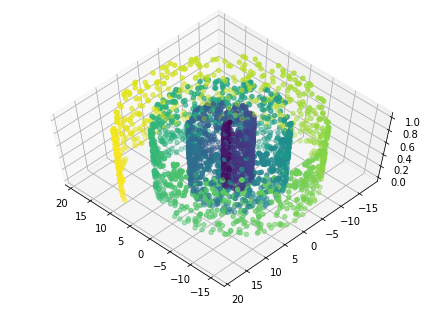

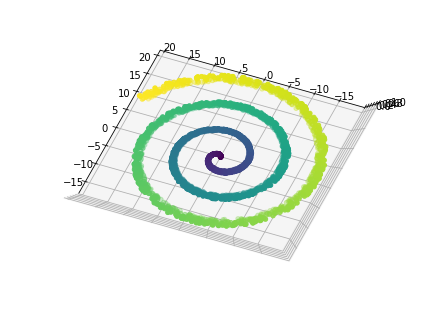

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# import plotly.plotly as py
%matplotlib inline

#generate random vectors
u = np.random.uniform(0,20,3000)
v = np.random.uniform(0,1,3000)

#3D embedding
x = u*np.cos(u)
y = u*np.sin(u)
z = v
data_SR = np.array((x, y, z), dtype=float).transpose() #added python3
extra_feat_1 = u+v #added python3
extra_feat_2 = u-v #added python3
data_SR_ext = np.array((x, y, z, extra_feat_1, extra_feat_2), dtype=float).transpose() #added python3
print(data_SR.shape)
#color vector
color = u/max(u)

#ploting 3D
fig3 = plt.figure()
plt.clf()
ax3 = Axes3D(fig3, rect=[0, 0, .95, 1], elev=320, azim=320)
plt.cla()
ax3.scatter(x, y, z, c=color)
plt.show()

fig1 = plt.figure()
plt.clf()
ax1 = Axes3D(fig1, rect=[0, 0, .95, 1], elev=65, azim=134)
plt.cla()
ax1.scatter(x, y, z, c=color)
plt.show()

fig2 = plt.figure()
plt.clf()
ax2 = Axes3D(fig2, rect=[0, 0, .95, 1], elev=90, azim=200)
plt.cla()
ax2.scatter(x, y, z, c=color)
plt.show()

1.1.3 

since the data is constructed from 2 vectors of dimension nX1, its intrinsic dimention is 2. Since the transformation keeps v, but transforms u to polar cordinates, we get that after transformation, data's dimention is 3.

### 1.2 Face Dataset

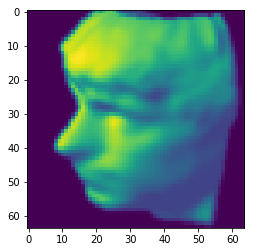

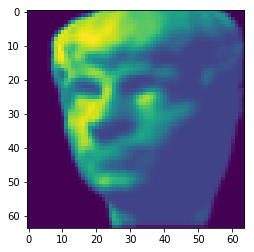

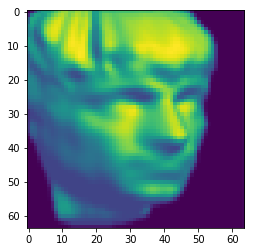

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

%matplotlib inline

data = sio.loadmat('./face_data.mat')
images = data['images']

imm1 = np.rot90(np.reshape(images.T[5],(64,64))*255,k=3)
plt.imshow(imm1, interpolation='nearest')
plt.show()

imm2 = np.rot90(np.reshape(images.T[1],(64,64))*255,k=3)
plt.imshow(imm2, interpolation='nearest')
plt.show()

imm3 = np.rot90(np.reshape(images.T[2],(64,64))*255,k=3)
plt.imshow(imm3, interpolation='nearest')
plt.show()

1.2.3 

since the data is constructed from 2 vectors of dimension nX1, its intrinsic dimention is 2. Since the transformation keeps v, but transforms u to polar cordinates, we get that after transformation, data's dimention is 3.

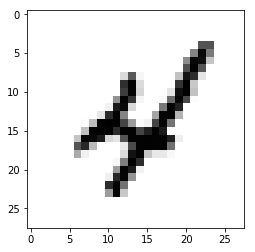

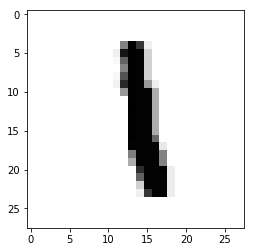

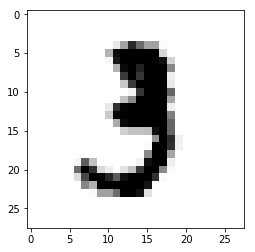

In [5]:
import pickle, gzip
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

f = gzip.open('./mnist.pkl.gz','rb')
train_set, valid_set,test_set = pickle.load(f)
f.close()
train_set_images = train_set[0]
train_set_images = train_set_images.T
train_set_digit_number = train_set[1]
# print(np.shape(train_set_images))
mnist = train_set_images.T[train_set_digit_number <6].T
# mnist.shape

imm1 = np.rot90(np.reshape(mnist.T[8],(28,28))*255,k=0)
plt.imshow(imm1, cmap='Greys', interpolation='nearest')
plt.show()

imm2 = np.rot90(np.reshape(mnist.T[5],(28,28))*255,k=0)
plt.imshow(imm2, cmap='Greys', interpolation='nearest')
plt.show()

imm3 = np.rot90(np.reshape(mnist.T[9],(28,28))*255,k=0)
plt.imshow(imm3, cmap='Greys', interpolation='nearest')
plt.show()

1.3.3 

since the data is constructed from 2 vectors of dimension nX1, its intrinsic dimention is 2. Since the transformation keeps v, but transforms u to polar cordinates, we get that after transformation, data's dimention is 3.

[ 0.52858188  0.47078047]
data_SR_pca shape is:(3000L, 2L)
data_SR_kpca shape is:(3000L, 2L)
[ 0.41558971  0.3230356 ]
data_SR_ext_pca shape is:(3000L, 2L)


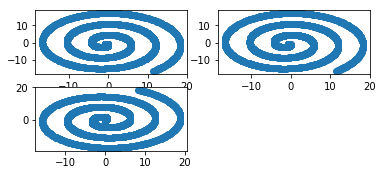

In [6]:
#Q2 #python3
#Q2.1 #python3
from sklearn.decomposition import PCA, KernelPCA
d = 2
#Q2.1.1 #python3

#Q2.1.1.1 #python3
pca = PCA(n_components = d)
pca.fit(data_SR)
PCA(copy=True, iterated_power='auto', n_components=d, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
print(pca.explained_variance_ratio_)  
data_SR_pca = pca.transform(data_SR)
print('data_SR_pca shape is:' + str(data_SR_pca.shape))
plt.subplot(321)
plt.scatter(data_SR_pca[:,0], data_SR_pca[:,1])

#Q2.1.1.2 #python3
kpca = KernelPCA(n_components = d)
kpca.fit(data_SR)
kpca = KernelPCA(n_components = d, kernel='rbf')
data_SR_kpca = pca.transform(data_SR)
print('data_SR_kpca shape is:' + str(data_SR_kpca.shape))
plt.subplot(322)
plt.scatter(data_SR_kpca[:,0], data_SR_kpca[:,1])

#Q2.1.1.3 #python3
pca = PCA(n_components = d)
pca.fit(data_SR_ext)
PCA(copy=True, iterated_power='auto', n_components=d, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
print(pca.explained_variance_ratio_)  
data_SR_ext_pca = pca.transform(data_SR_ext)
print('data_SR_ext_pca shape is:' + str(data_SR_ext_pca.shape))
plt.subplot(323)
plt.scatter(data_SR_ext[:,0], data_SR_ext[:,1])


data_SR_lle shape is:(3000L, 2L)
data_SR_isomap shape is:(3000L, 2L)


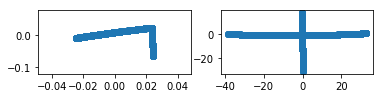

In [7]:
#Q2.1.2 #python2
from sklearn.manifold import LocallyLinearEmbedding as LLE
from sklearn.manifold import Isomap
#LLE
n_neighbors = 10
lle = LLE(n_components = d, n_neighbors = n_neighbors)
lle.fit(data_SR)
data_SR_lle = lle.transform(data_SR)
print('data_SR_lle shape is:' + str(data_SR_lle.shape))
plt.subplot(321)
plt.scatter(data_SR_lle[:,0], data_SR_lle[:,1])
#Isomap
isomap = Isomap(n_components = d)
isomap.fit(data_SR)
data_SR_isomap = isomap.transform(data_SR)
print('data_SR_isomap shape is:' + str(data_SR_isomap.shape))
plt.subplot(322)
plt.scatter(data_SR_isomap[:,0], data_SR_isomap[:,1])

In [127]:
#Q2.1.3 #python2
from sklearn.neighbors import NearestNeighbors
from numpy.linalg import norm


def nn2_dists(orig_data, RD_data):    
    nbrs2 = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(RD_data)
    distances_RD_nn2, indices_RD_nn2 = nbrs2.kneighbors(RD_data)
    first_neigh = indices_RD_nn2[0,0]
    second_neigh = indices_RD_nn2[0,1]
    print("first neighbour is:" + str(first_neigh))
    print("second neighbour is:" + str(second_neigh))
    dist_RD = distances_RD_nn2[0,1]
    dist_orig = norm(orig_data[first_neigh,:]-orig_data[second_neigh,:])

    print("the distance in the original space is:"+str(dist_orig)+"the distance in the Reduced space is:"+str(dist_RD))
orig_data = data_SR
#PCA
print("PCA:")
RD_data = data_SR_pca
nn2_dists(orig_data, RD_data)

#KPCA
print("KPCA:")
RD_data = data_SR_kpca
nn2_dists(orig_data, RD_data)

#LLE
print("LLE:")
RD_data = data_SR_lle
nn2_dists(orig_data, RD_data)

#Isomap
print("Isomap:")
RD_data = data_SR_isomap
nn2_dists(orig_data, RD_data)

PCA:
first neighbour is:0
second neighbour is:1858
the distance in the original space is:0.0883590176161the distance in the Reduced space is:0.0128539395374
KPCA:
first neighbour is:0
second neighbour is:1858
the distance in the original space is:0.0883590176161the distance in the Reduced space is:0.0128539395374
LLE:
first neighbour is:0
second neighbour is:1858
the distance in the original space is:0.0883590176161the distance in the Reduced space is:1.64372900462e-05
Isomap:
first neighbour is:0
second neighbour is:930
the distance in the original space is:0.537985800568the distance in the Reduced space is:0.00599339763078


In [125]:
#Q2.1.3.2 #python2


def nn40_dists(orig_data, RD_data):    
    nbrs40 = NearestNeighbors(n_neighbors=40, algorithm='ball_tree').fit(RD_data)
    distances_RD_nn40, indices_RD_nn40 = nbrs40.kneighbors(RD_data)
    indices_RD_nn40.shape
    distances_RD_nn40.shape
    non_neighbour1 = indices_RD_nn40[0,0]
    non_neighbour2 = []
    for i in range(RD_data.shape[0]):
      if not i in indices_RD_nn40[non_neighbour1,:]:
        non_neighbour2 = i 
        print (str(non_neighbour2) + " is not a neighbour of " + str(non_neighbour1))
        break
    print("chosen neighbours are: "+str(non_neighbour1)+" and "+str(non_neighbour2))
    dist_orig = norm(orig_data[non_neighbour1,:]-orig_data[non_neighbour2,:])
    dist_RD = norm(RD_data[non_neighbour1,:]-RD_data[non_neighbour2,:])
    print("for non 40 NN points")
    print("the distance in the original space is:"+str(dist_orig)+"the distance in the Reduced space is:"+str(dist_RD))
orig_data = data_SR
#PCA
print("PCA:")
RD_data = data_SR_pca
nn40_dists(orig_data, RD_data)
    
#KPCA
print("KPCA:")
RD_data = data_SR_kpca
nn40_dists(orig_data, RD_data)

#LLE
print("LLE:")
RD_data = data_SR_lle
nn40_dists(orig_data, RD_data)

#Isomap
print("Isomap:")
RD_data = data_SR_isomap
nn40_dists(orig_data, RD_data)



PCA:
1 is not a neighbour of 0
chosen neighbours are: 0 and 1
for non 40 NN points
the distance in the original space is:12.7705044694the distance in the Reduced space is:12.7690593989
KPCA:
1 is not a neighbour of 0
chosen neighbours are: 0 and 1
for non 40 NN points
the distance in the original space is:12.7705044694the distance in the Reduced space is:12.7690593989
LLE:
1 is not a neighbour of 0
chosen neighbours are: 0 and 1
for non 40 NN points
the distance in the original space is:12.7705044694the distance in the Reduced space is:0.0456201288675
Isomap:
1 is not a neighbour of 0
chosen neighbours are: 0 and 1
for non 40 NN points
the distance in the original space is:12.7705044694the distance in the Reduced space is:37.1757873197


In [121]:
#Q2.1.3.3 #python2

def C_MDS (orig_data, RD_data):
    nbrs12_orig = NearestNeighbors(n_neighbors=12, algorithm='ball_tree').fit(orig_data)
    distances_orig_nn12, indices_orig_nn12 = nbrs12_orig.kneighbors(orig_data)
    nbrs12 = NearestNeighbors(n_neighbors=12, algorithm='ball_tree').fit(RD_data)
    distances_RD_nn12, indices_RD_nn12 = nbrs12.kneighbors(RD_data)
    C_RD = 0
    total_MDS = 0
    for i in range(RD_data.shape[0]):
        common_list = list(set(indices_orig_nn12[i,:]).intersection(indices_RD_nn12[i,:]))
        common_size = len(common_list)
        MDS = 0
        for j in range(common_size):
            RD_dist = norm(RD_data[common_list[j],:]-RD_data[i,:])
            orig_dist = norm(orig_data[common_list[j],:]-orig_data[i,:])
            MDS += (RD_dist - orig_dist)**2
        total_MDS += MDS/common_size
        C_RD += (n_neighbors-common_size)
    C_RD = C_RD/RD_data.shape[0]
    total_MDS = total_MDS/RD_data.shape[0]
    return C_RD, total_MDS
#PCA
print("PCA:")
orig_data = data_SR
RD_data = data_SR_pca
C_PCA, total_MDS_PCA =  C_MDS(orig_data, RD_data)
print("the mean value of C is "+ str(C_PCA))
print("the mean value of MDS is "+ str(total_MDS_PCA))

#KPCA
print("KPCA:")
RD_data = data_SR_kpca
C_KPCA, total_MDS_KPCA =  C_MDS(orig_data, RD_data)
print("the mean value of C is "+ str(C_KPCA))
print("the mean value of MDS is "+ str(total_MDS_KPCA))

#LLE
print("LLE:")
RD_data = data_SR_lle
C_LLE, total_MDS_LLE =  C_MDS(orig_data, RD_data)
print("the mean value of C is "+ str(C_LLE))
print("the mean value of MDS is "+ str(total_MDS_LLE))

#Isomap
print("Isomap:")
RD_data = data_SR_isomap
C_Isomap, total_MDS_Isomap =  C_MDS(orig_data, RD_data)
print("the mean value of C is "+ str(C_Isomap))
print("the mean value of MDS is "+ str(total_MDS_Isomap))


PCA:
the mean value of C is 1
the mean value of MDS is 0.0312426372974
KPCA:
the mean value of C is 1
the mean value of MDS is 0.0312426372974
LLE:
the mean value of C is 1
the mean value of MDS is 0.13590589882
Isomap:
the mean value of C is 2
the mean value of MDS is 0.0581887064361


In [ ]:
#Q2.1.3.4 #python2

#Verification of the intrinsic dimension
## implement Maximum Likelihood Estimation of Intrinsic Dimension
#plot sum of eigenvalues outside of reduced model (d+1...D) as a function of 
#choose d corresponding to graphs "knee"
from scipy.spatial import distance_matrix
import numpy as np

# def qsort(inlist):
#     if inlist == []: 
#         return []
#     else:
#         pivot = inlist[0]
#         lesser = qsort([x for x in inlist[1:] if x < pivot])
#         greater = qsort([x for x in inlist[1:] if x >= pivot])
#         return lesser + [pivot] + greater

def Tk_index(M): 
    TK = np.zeros(M.shape)
    for i in range(M.shape[0]):
        kNN = sorted(M[i])
        for j,l in enumerate(kNN):
            TK[i][j] = list(M[i]).index(l)
            
    return TK

def Tk(D,Tk_ind,k_max):
    TK = np.zeros([D.shape[0],k_max]) #maybe define float?
    for i in range(D.shape[0]):
        for j in range(k_max):
            TK[i][j] = D[i][int(Tk_ind[i][j])]
    return TK
    
def Mk_Xi (TK, k1):
    MK = np.zeros(TK.shape)
    for i in range(TK.shape[0]):
        for j in range(k1,TK.shape[1]): # from 1 to avoide division by 0
            MK[i][j] = np.sum(np.log(TK[i][j]/(TK[i][1:j])*1.0))/(j*1.0-1) #1.0 to make float
    return MK

def est_intrinsic_dim(data, k1, k2):
    distance_mat = distance_matrix(data, data)
    Tk_ind = Tk_index(distance_mat)
    TK = Tk(distance_mat,Tk_ind,k2)
    MK_i = Mk_Xi(TK, k1)
    MK = np.sum(MK_i,axis = 0)/(num_of_samples*1.0) #sum over rows
    M = np.sum(1/MK[k1:k2])/(k2-k1*1.0+1)
    return M

#
num_of_samples = 3000
data = data_SR[0:num_of_samples] #slice data
k1 = 2
k2 = 3 
M = est_intrinsic_dim(data, k1, k2)
print("M is: "+str(M))
    







In [57]:
np.sum(1/MK[k1:k2])/(k2-k1*1.0+1)


1.4190610813996083

[ 0.5274818  0.1388326]
data_SR_pca shape is:(3000L, 2L)


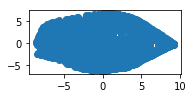

In [7]:
#Face Dataset
# #Q2.2.1 #python2
# d = 2
# #Q2.1.1 #python3
# #Q2.1.1.1 #python3
DataFace = images.T.transpose() # dim: 4096x698
pca = PCA(n_components = d)
pca.fit(DataFace)
PCA(copy=True, iterated_power='auto', n_components=d, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
print(pca.explained_variance_ratio_)  
DataFace_pca = pca.transform(DataFace)
print('data_SR_pca shape is:' + str(data_SR_pca.shape))
plt.subplot(321)
plt.scatter(DataFace_pca[:,0], DataFace_pca[:,1])
# #Q2.1.1.2 #python3
# kpca = KernelPCA(n_components = d)
# kpca.fit(data_SR)
# kpca = KernelPCA(n_components = d, kernel='rbf')
# data_SR_kpca = pca.transform(data_SR)
# print('data_SR_kpca shape is:' + str(data_SR_kpca.shape))
# plt.subplot(322)
# plt.scatter(data_SR_kpca[:,0], data_SR_kpca[:,1])

# #Q2.1.1.3 #python3
# pca = PCA(n_components = d)
# pca.fit(data_SR_ext)
# PCA(copy=True, iterated_power='auto', n_components=d, random_state=None,
#   svd_solver='auto', tol=0.0, whiten=False)
# print(pca.explained_variance_ratio_)  
# data_SR_ext_pca = pca.transform(data_SR_ext)
# print('data_SR_ext_pca shape is:' + str(data_SR_ext_pca.shape))
# plt.subplot(323)
# plt.scatter(data_SR_ext[:,0], data_SR_ext[:,1])
